**Author**:Sai krishna Kadari

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [4]:
iris=load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data['species']=iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


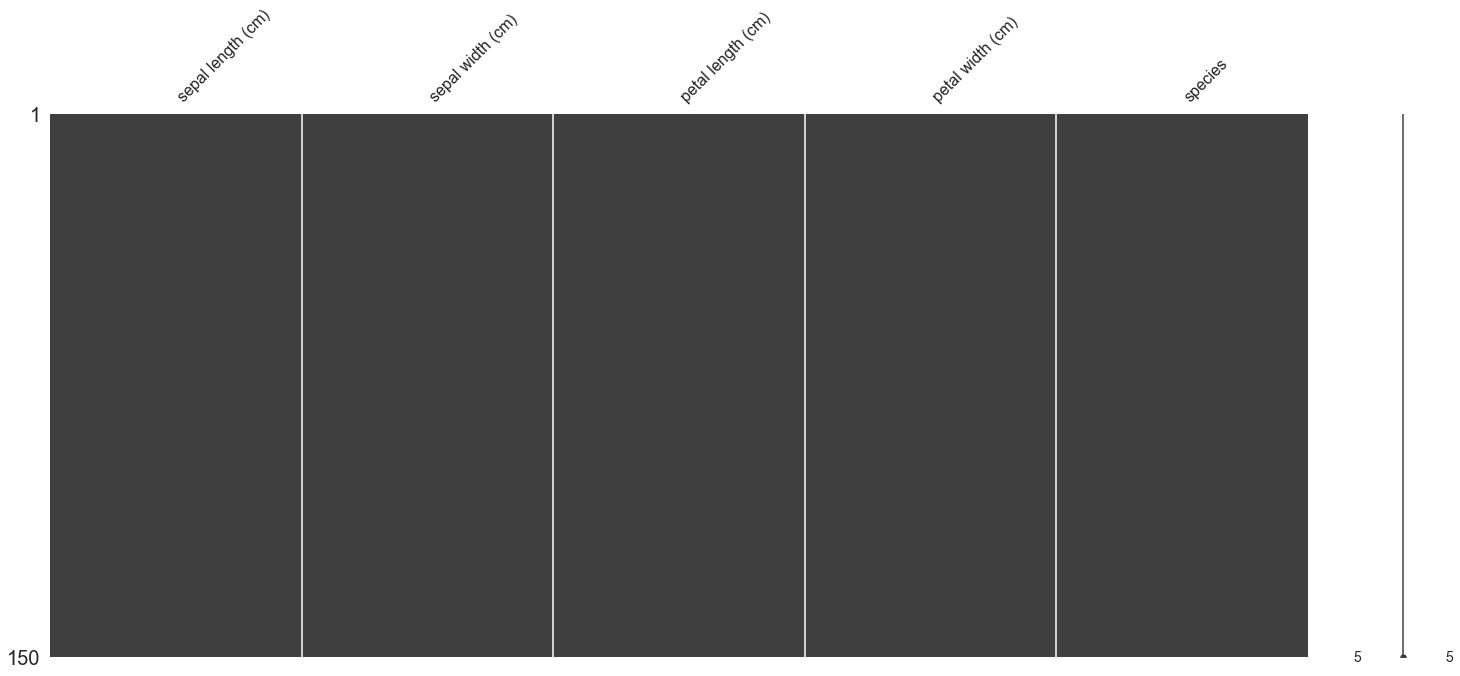

In [5]:
#getting to know missing values
import missingno as mn
mn.matrix(data)

In [6]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

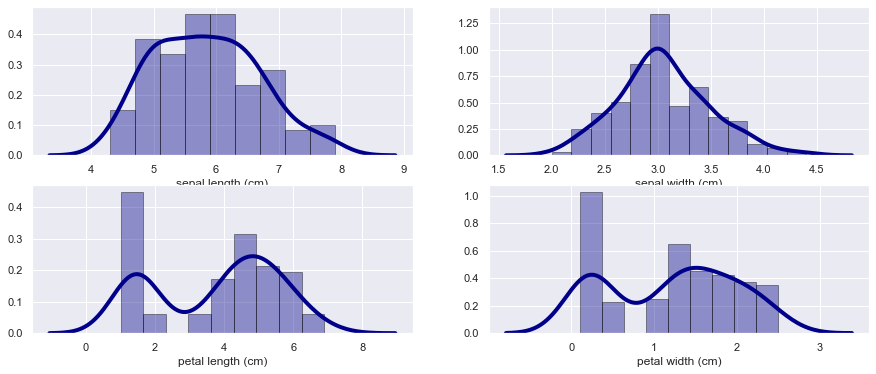

In [7]:
plt.figure()
fig,ax=plt.subplots(2,2,figsize=(15,6))


sns.distplot(data['sepal length (cm)'],ax=ax[0][0],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})
sns.distplot(data['sepal width (cm)'],ax=ax[0][1],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})
sns.distplot(data['petal length (cm)'],ax=ax[1][0],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})
sns.distplot(data['petal width (cm)'],ax=ax[1][1],hist=True,kde=True,
            bins='auto',color='darkblue',
            hist_kws={'edgecolor':'black'},
            kde_kws={'linewidth':4})

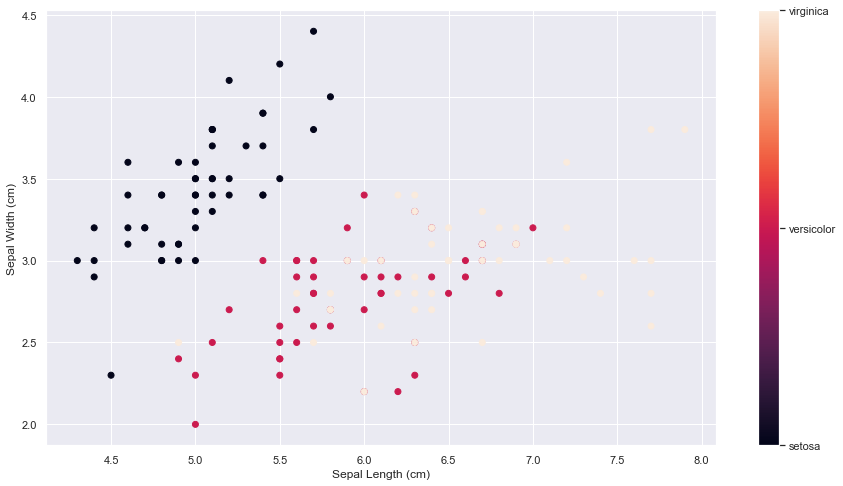

In [8]:
formatter=plt.FuncFormatter(lambda i,*args: iris.target_names[int(i)])
plt.figure(figsize=(15,8))
plt.scatter(np.array(data.iloc[:,0]),np.array(data.iloc[:,1]),c=data.species)
plt.colorbar(ticks=[0,1,2],format=formatter)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

## Facing off, Decision Tree Algorithm

In [9]:
X=data.iloc[:,0:4].values
y=data.iloc[:,4].values

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipeline=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='entropy',max_depth=4))

In [13]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='entropy',
                                        max_depth=4, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)

In [15]:
pipeline.score(X_train,y_train),pipeline.score(X_test,y_test)

(1.0, 0.9777777777777777)

In [16]:
pipeline=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='entropy',max_depth=4))

In [21]:
from sklearn.ensemble import BaggingClassifier
bgclf=BaggingClassifier(base_estimator=pipeline,n_estimators=100,max_samples=10,random_state=1,n_jobs=5)

In [22]:
bgclf.fit(X_train,y_train)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True)),
                                                 ('decisiontreeclassifier',
                                                  DecisionTreeClassifier(class_weight=None,
                                                                         criterion='entropy',
                                                                         max_depth=4,
                                                                         max_features=None,
                                                                         max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,
    

In [24]:
bgclf.score(X_train,y_train),bgclf.score(X_test,y_test)

(0.9333333333333333, 0.9555555555555556)

In [25]:
y_train_pred=bgclf.predict(X_train)
y_test_pred=bgclf.predict(X_test)
y_test_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2])

### Evaluation

[[29  0  0]
 [ 0 38  5]
 [ 0  2 31]]


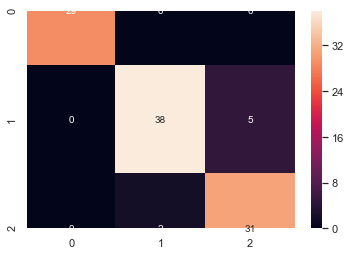

In [26]:
cm_train=metrics.confusion_matrix(y_train_pred,y_train)
print(cm_train)
sns.heatmap(cm_train,annot=True)

[[21  0  0]
 [ 0  9  1]
 [ 0  1 13]]


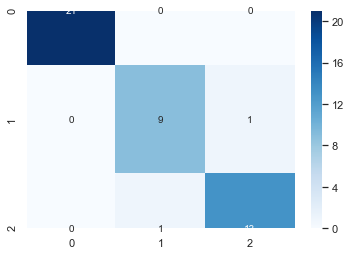

In [27]:
cm_test=metrics.confusion_matrix(y_test_pred,y_test)
print(cm_test)
sns.heatmap(cm_test,annot=True,cmap='Blues')

In [28]:
metrics.accuracy_score(y_test_pred,y_test)

0.9555555555555556

## Cheers!!!
## Then, Plotting our Pretty Decision Tree

In [29]:
import graphviz

In [32]:
import pydotplus
from IPython.display import Image

In [33]:
from sklearn import tree
dot_data=tree.export_graphviz(clf,out_file=None,feature_names=iris.feature_names,filled=True)

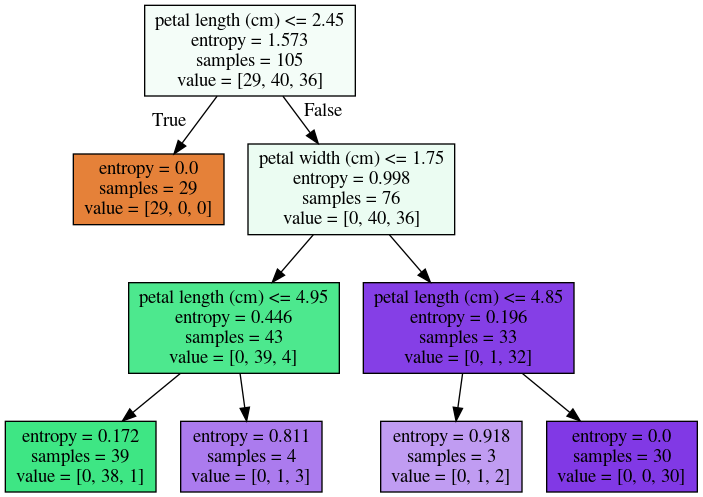

In [34]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree Growth

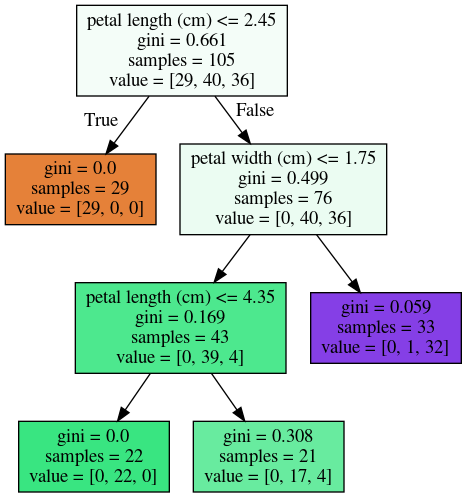

In [35]:
clftree2=DecisionTreeClassifier(min_samples_leaf=20,max_depth=5)
clftree2.fit(X_train,y_train)
dot_data=tree.export_graphviz(clftree2,out_file=None,feature_names=iris.feature_names,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())